In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('pd-speech-features.csv', header=1)
data.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


Tidak ada missing value

In [4]:
data['class'].value_counts()

1    564
0    192
Name: class, dtype: int64

In [32]:
X = data.iloc[:,1:-1].values
y = data.iloc[:,-1].values
print("X shape : ", X.shape)
print("y shape : ", y.shape)

X shape :  (756, 753)
y shape :  (756,)


### Membagi dataset menjadi data training dan data validasi

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=0)
print("X_train shape : ", X_train.shape)
print("y_train shape : ", y_train.shape)
print("X_val shape : ", X_val.shape)
print("y_val shape : ", y_val.shape)

X_train shape :  (604, 753)
y_train shape :  (604,)
X_val shape :  (152, 753)
y_val shape :  (152,)


In [34]:
print('class = 0 :',len(y_train[y_train==0]))
print('class = 1 :',len(y_train[y_train==1]))

class = 0 : 154
class = 1 : 450


### Melakukan Scaling

In [35]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_val = sc_X.transform(X_val)

### Naive Bayes Classifier

In [36]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_val)

In [37]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

Accuracy: 0.7894736842105263


### Cross Validation

In [38]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(classifier, X,y, cv=5)
print("Accuracy : ",np.mean(cv)*100)

Accuracy :  75.5214592773324


### Confusion Matrix

Confusion Matrix :
 [[24 14]
 [18 96]]


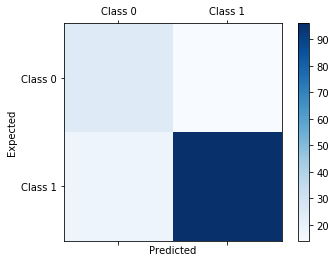

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)
print('Confusion Matrix :\n',cm)

labels = ['Class 0','Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [27]:
#print(metrics.classification_report(y_val, y_pred))

In [40]:
def NB(features,y):
    X = data.loc[:,features].values
    
    X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=0)
    
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_val = sc_X.transform(X_val)
    
    classifier = GaussianNB()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_val)
    
    cv = cross_val_score(classifier, X,y, cv=5)
    return(print("Accuracy : ",np.mean(cv)*100))

### Feature Set
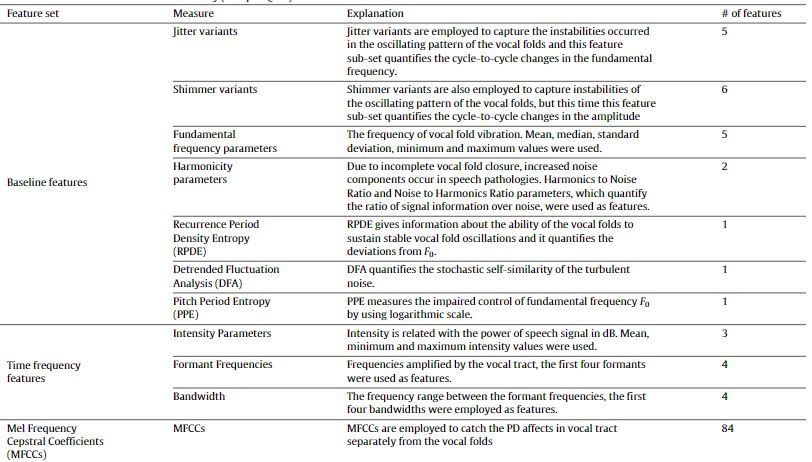
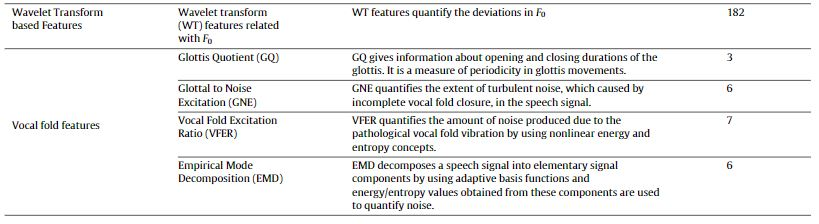

In [41]:
baseline_features = data.columns[2:23]
timeFreq_features = data.columns[23:34]
vocalFold_features = data.columns[34:56]
MFCC_features = data.columns[56:140]
WT_features = data.columns[140:322]
tqwt_features = data.columns[322:-2]

In [42]:
print('Baseline Features : ')
NB(baseline_features,y)
print('\ntimeFreq Features : ') 
NB(timeFreq_features,y)
print('\nvocalFold Features : ')
NB(vocalFold_features,y)
print('\nMFCC Features : ')
NB(MFCC_features,y)
print('\nWT Features : ') 
NB(WT_features,y)
print('\ntqwt Features : ')
NB(tqwt_features,y)

Baseline Features : 
Accuracy :  60.43753921226909

timeFreq Features : 
Accuracy :  66.66464505634949

vocalFold Features : 
Accuracy :  62.442628093412345

MFCC Features : 
Accuracy :  57.267421865923076

WT Features : 
Accuracy :  74.9934007203439

tqwt Features : 
Accuracy :  61.22691994887882


In [43]:
#Tanpa MFCC Features
a = [baseline_features, timeFreq_features,vocalFold_features,WT_features,tqwt_features]

features = []
for i in range(len(a)):
    features.extend(a[i])

print('Tanpa MFCC Features : ')
NB(features,y)

Tanpa MFCC Features : 
Accuracy :  75.5214592773324


In [44]:
#Tanpa WT Features
b = [baseline_features, timeFreq_features,vocalFold_features,MFCC_features,tqwt_features]

features = []
for i in range(len(b)):
    features.extend(b[i])

print('Tanpa WT Features : ')
NB(features,y)

Tanpa WT Features : 
Accuracy :  61.23305449053097


In [45]:
WT_features

Index(['Ea', 'Ed_1_coef', 'Ed_2_coef', 'Ed_3_coef', 'Ed_4_coef', 'Ed_5_coef',
       'Ed_6_coef', 'Ed_7_coef', 'Ed_8_coef', 'Ed_9_coef',
       ...
       'app_LT_TKEO_std_1_coef', 'app_LT_TKEO_std_2_coef',
       'app_LT_TKEO_std_3_coef', 'app_LT_TKEO_std_4_coef',
       'app_LT_TKEO_std_5_coef', 'app_LT_TKEO_std_6_coef',
       'app_LT_TKEO_std_7_coef', 'app_LT_TKEO_std_8_coef',
       'app_LT_TKEO_std_9_coef', 'app_LT_TKEO_std_10_coef'],
      dtype='object', length=182)